In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
raw_data=pd.read_csv('2.01. Admittance.csv')

In [8]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [9]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':0,'No':1})

In [10]:
data.head()

,SAT,Admitted
0,1363,1
1,1792,0
2,1954,0
3,1653,1
4,1593,1


In [12]:
y=data['Admitted']
x=data['SAT']

Text(0, 0.5, 'Admitted')

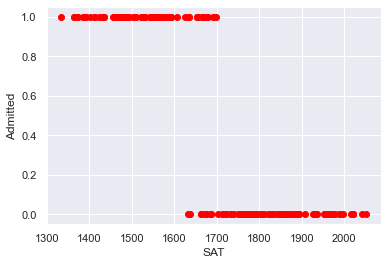

In [13]:
plt.scatter(x,y,color='red')
plt.xlabel('SAT')
plt.ylabel('Admitted')

In [15]:
x=sm.add_constant(x)

In [16]:
reg_log=sm.Logit(y,x)

In [17]:
results_log=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [18]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.7992
Time:                        21:04:31   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.9128     15.737      4.443      0.000      39.070     100.756
SAT           -0.0420      0.009     -4.454      0.000      -0.060      -0.024
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [19]:
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})
results_log.predict()

array([1.00, 0.00, 0.00, 0.62, 0.95, 0.02, 0.01, 0.00, 0.00, 0.97, 0.00,
       0.00, 0.50, 1.00, 0.23, 0.00, 0.79, 0.78, 0.77, 0.00, 0.00, 0.00,
       1.00, 1.00, 0.09, 0.00, 0.78, 0.00, 0.00, 0.02, 1.00, 0.39, 0.59,
       0.00, 0.00, 0.00, 0.50, 0.00, 0.61, 1.00, 0.96, 0.80, 0.00, 1.00,
       0.00, 1.00, 0.02, 1.00, 1.00, 0.99, 0.99, 0.00, 0.20, 0.99, 0.00,
       1.00, 0.44, 0.05, 0.78, 0.01, 0.99, 0.11, 0.00, 0.00, 0.01, 1.00,
       1.00, 1.00, 0.00, 1.00, 0.11, 0.78, 1.00, 0.00, 0.00, 0.00, 1.00,
       0.51, 0.00, 0.00, 0.99, 0.00, 0.00, 0.35, 0.00, 0.00, 1.00, 0.00,
       0.01, 0.28, 0.40, 1.00, 0.05, 0.09, 1.00, 0.00, 0.00, 0.99, 0.02,
       0.12, 0.01, 1.00, 0.01, 0.97, 1.00, 0.01, 0.01, 0.00, 1.00, 1.00,
       0.96, 0.48, 1.00, 0.00, 0.84, 1.00, 0.08, 1.00, 0.53, 0.00, 0.00,
       0.98, 1.00, 1.00, 0.00, 0.99, 0.04, 0.25, 0.28, 0.06, 0.40, 1.00,
       0.00, 1.00, 1.00, 1.00, 0.00, 0.92, 1.00, 0.99, 0.00, 0.02, 0.30,
       0.01, 0.00, 0.98, 1.00, 1.00, 1.00, 0.17, 0.

In [20]:
results_log.pred_table()

array([[87.00, 7.00],
       [7.00, 67.00]])

In [31]:
test_data=pd.read_csv('2.03. Test dataset.csv')

In [32]:
test_data['Admitted']=test_data['Admitted'].map({'Yes':1,'No':0})
test_data['Gender']=test_data['Gender'].map({'Female':1,'Male':0})

In [33]:
data=pd.read_csv('2.02. Binary predictors.csv')

In [34]:
data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [35]:
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data['Gender']=data['Gender'].map({'Female':1,'Male':0})

In [36]:
X=data[['SAT','Gender']]

In [37]:
Y=data['Admitted']

In [55]:
X=sm.add_constant(X)

In [56]:
X

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [52]:
reg=sm.Logit(Y,X)

In [57]:
results_log=reg.fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


In [58]:
results_log.predict(x)

0     4.416867e-07
1     9.742731e-01
2     9.941557e-01
3     9.781306e-01
4     3.215089e-01
5     3.814192e-02
6     9.797226e-01
7     9.991287e-01
8     9.999936e-01
9     7.308682e-01
10    9.999987e-01
11    9.999999e-01
12    8.638537e-01
13    6.007566e-05
14    8.493951e-01
15    9.999426e-01
16    3.173552e-04
17    4.065056e-03
18    9.998485e-01
dtype: float64

In [41]:
x=test_data[['SAT','Gender']]
y=test_data['Admitted']

In [48]:
x=sm.add_constant(x)

In [49]:
x

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [59]:
def confusion_matrix(data,actual_values,model):
    
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [60]:
cm=confusion_matrix(x,y,results_log)

In [61]:
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [62]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [63]:
print ('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
